<a href="https://colab.research.google.com/github/cvaldez83/Python-DataLit/blob/master/2_4_Histogram_and_Density_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograms and Density Plots

In this notebook we will look at the [NYCFlights13 dataset](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf), which contains information on over 300,000 planes departing NYC airports in 2013. We will focus on visualizing the distribution of arrival delays given in minutes. 

## Data Import 

In [7]:
from google.colab import files
uploaded = files.upload()


Saving formatted_flights.csv to formatted_flights.csv


In [8]:
#read data
import pandas as pd
flights = pd.read_csv('formatted_flights.csv')
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


The flight arrival delays are in minutes and negative values mean the flight was early (it turns out flights often tend to arrive early, just never when we’re on them!) There are over 300,000 flights with a minimum delay of -60 minutes and a maximum delay of 120 minutes. The other column in the dataframe is the name of the airline which we can use for comparisons.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Flights')

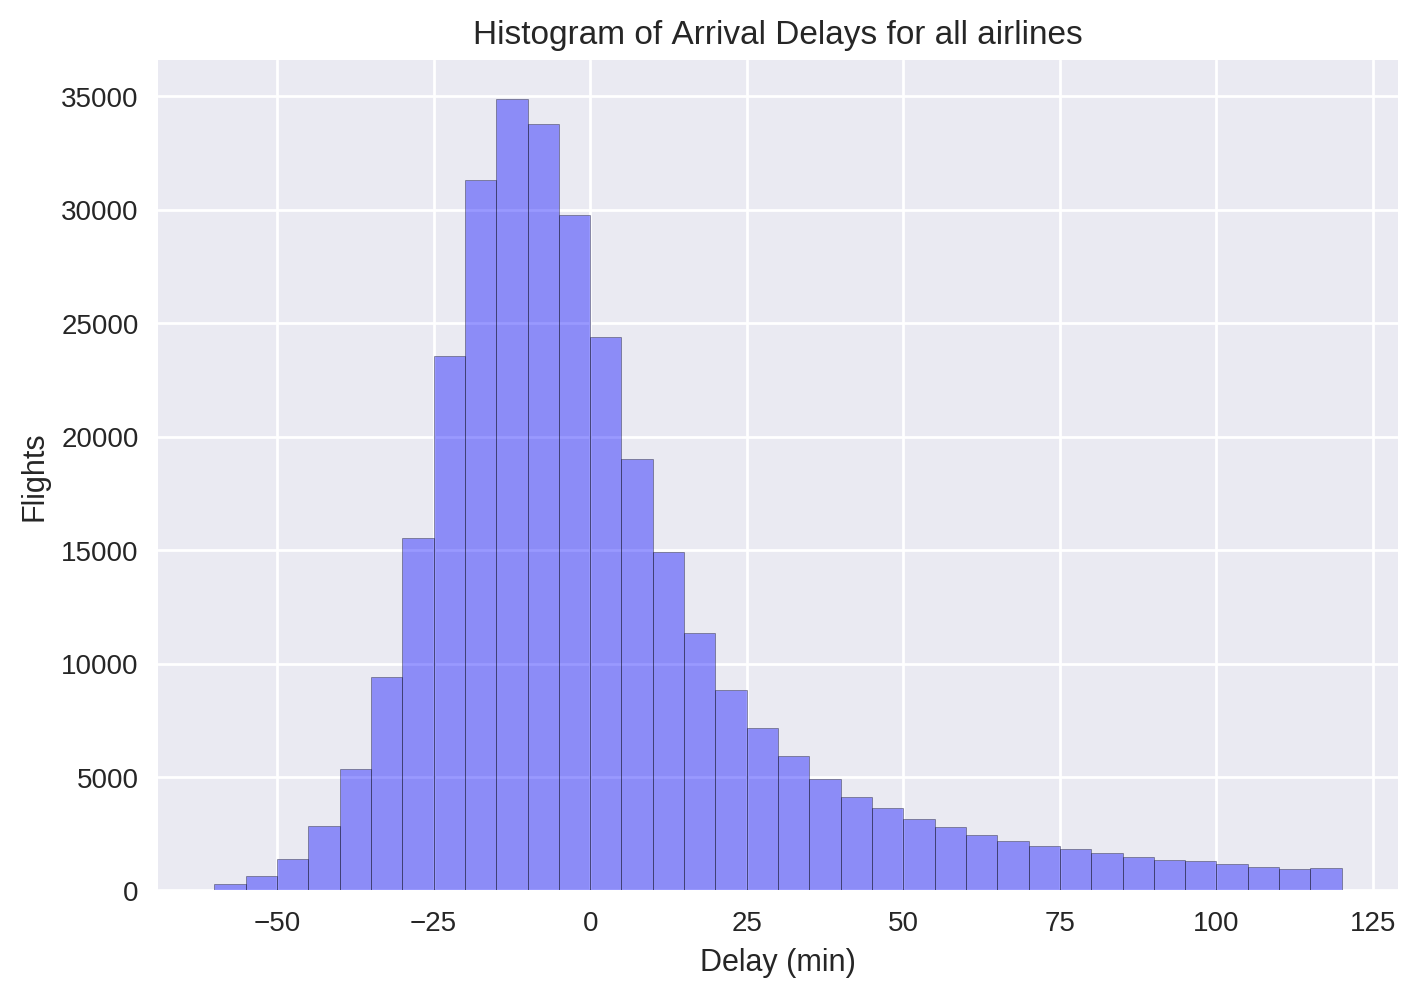

In [9]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

# matplotlib histogram
#plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         #bins = int(180/5))

# seaborn histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays for all airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

## Side by side histograms for each airline

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

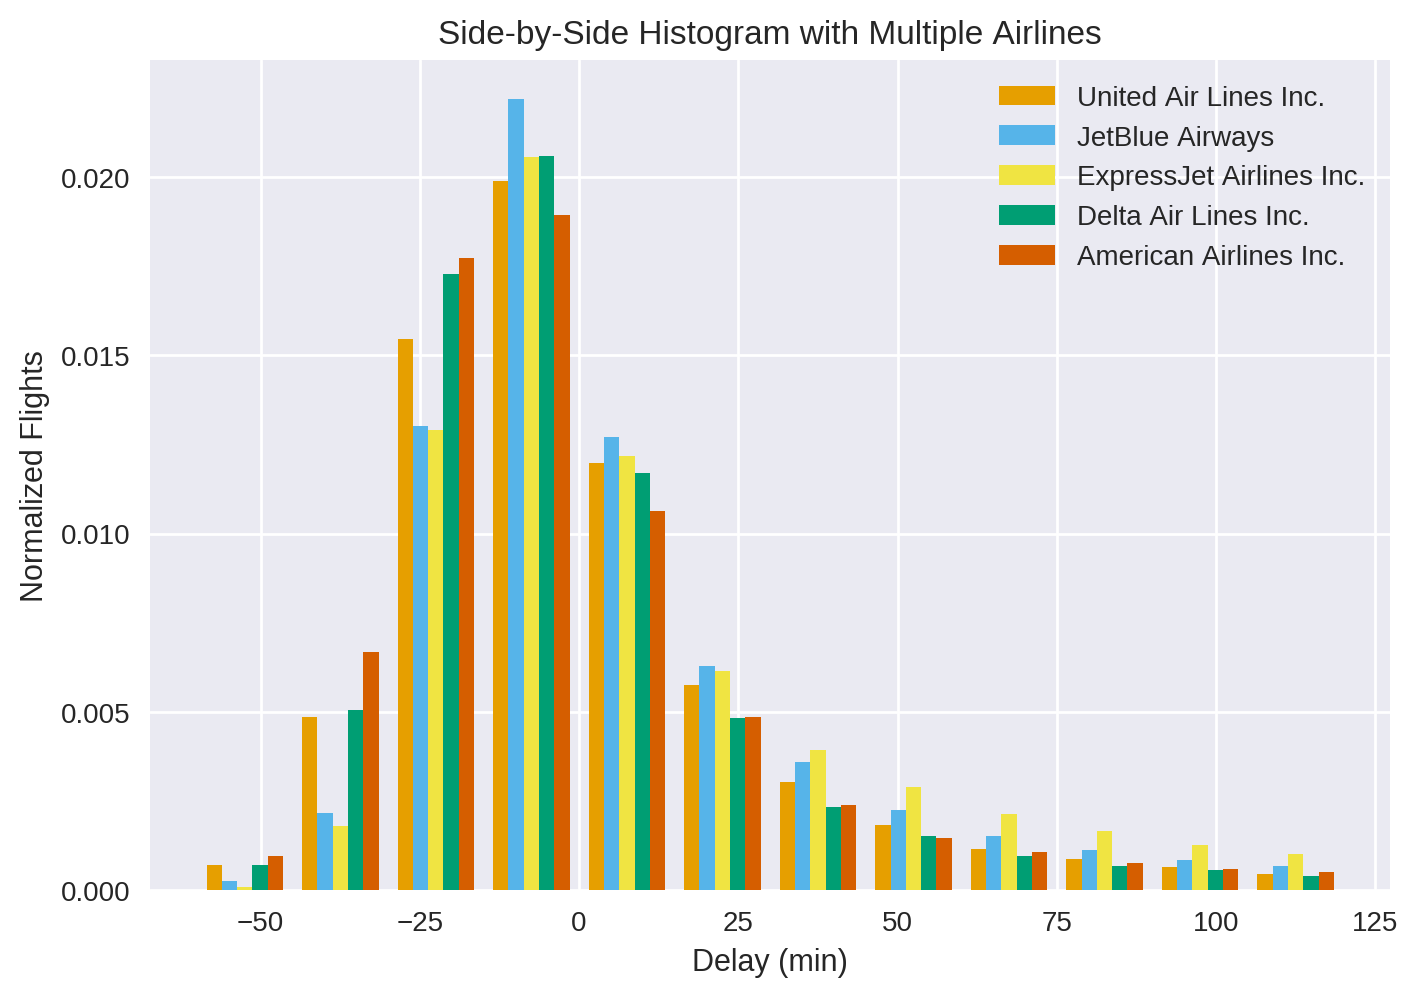

In [24]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.', 'Delta Air Lines Inc.', 'American Airlines Inc.']

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

## Stacked histograms for each airline (Not very useful because its not easy to see)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

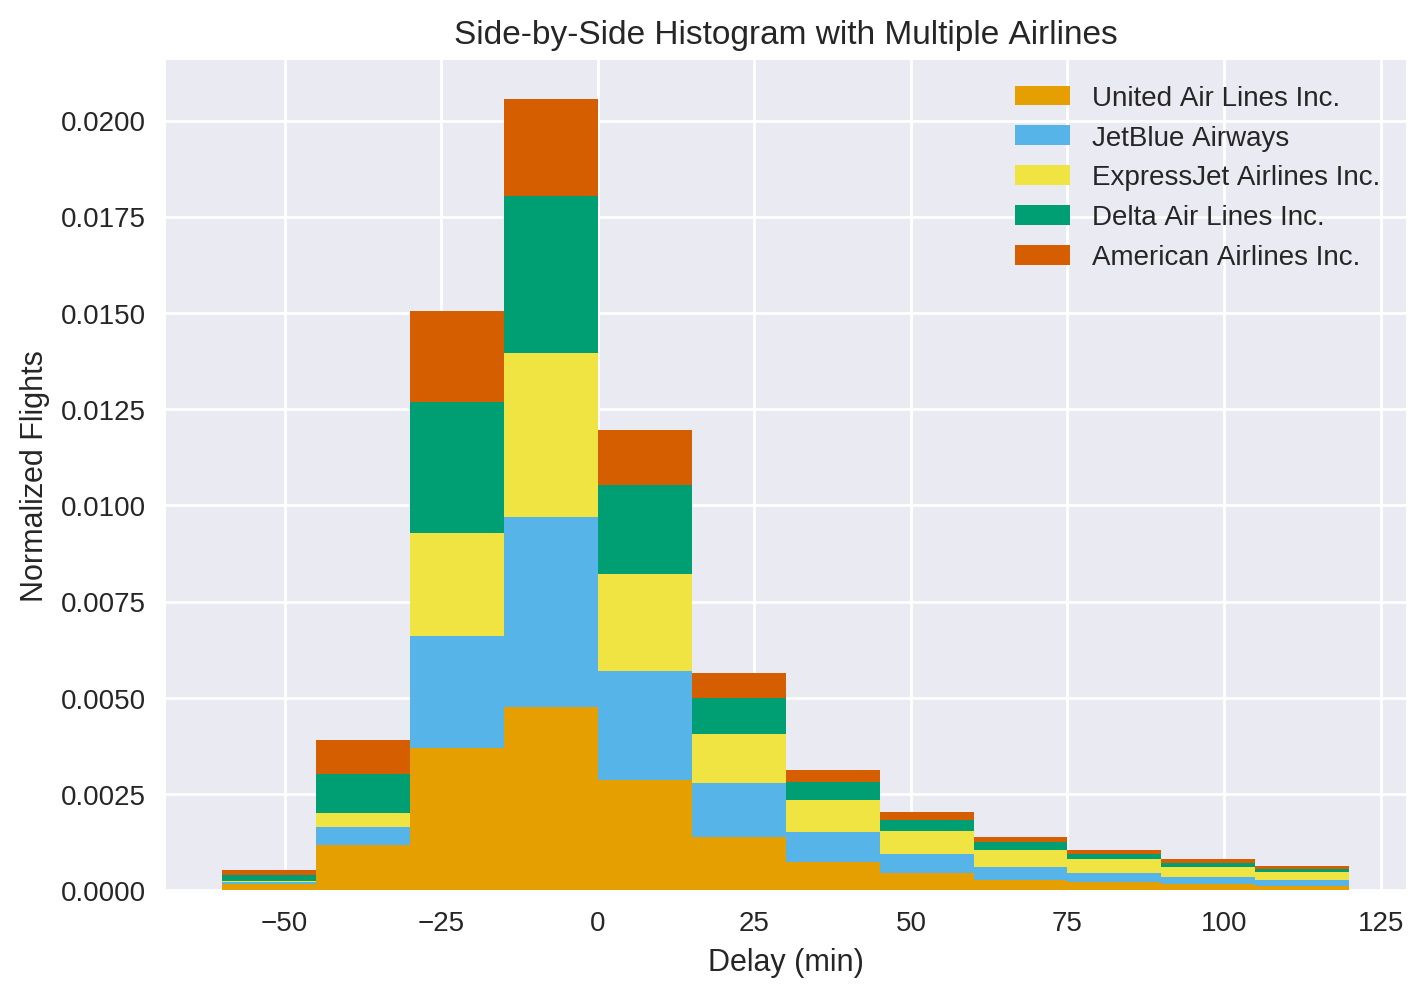

In [23]:
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True, normed=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

## Density plots

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


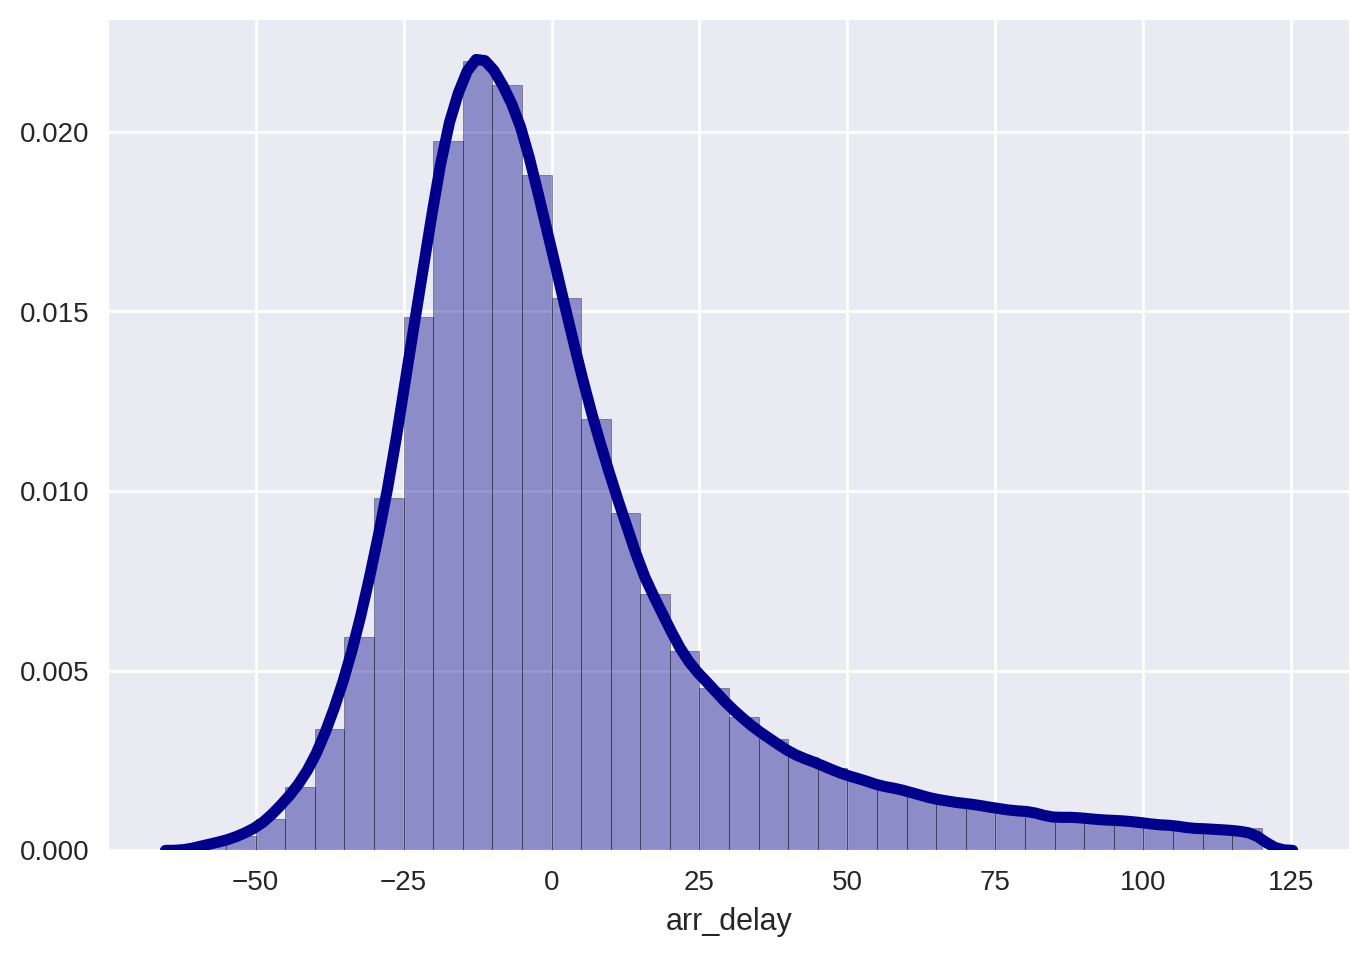

In [25]:
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Density plots with multiple airlines

Text(0, 0.5, 'Density')

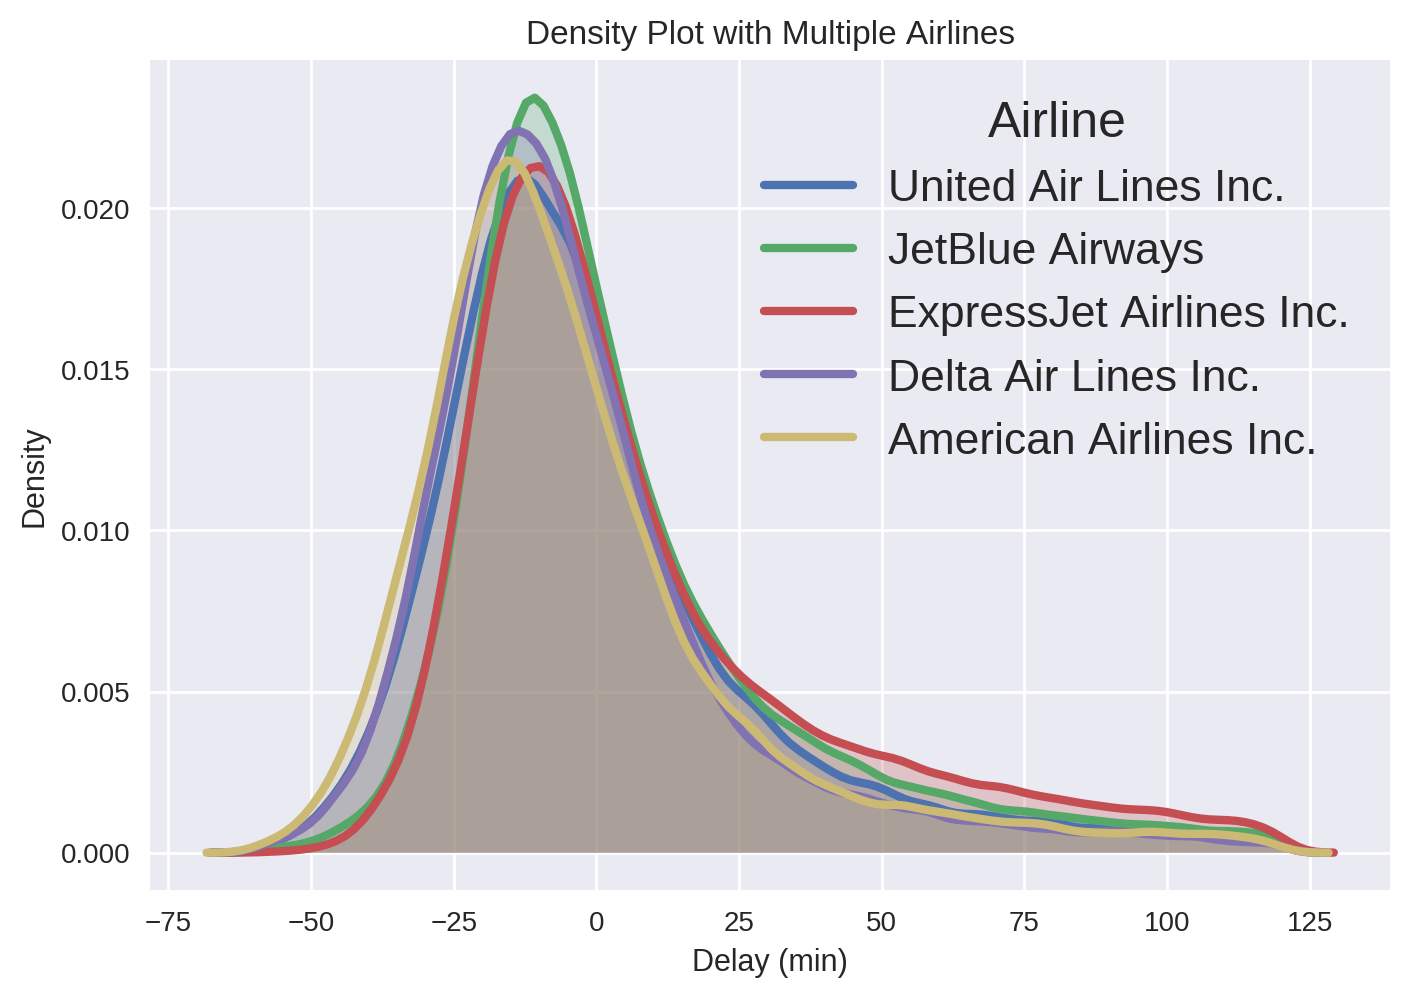

In [33]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]

    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade':True, 'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

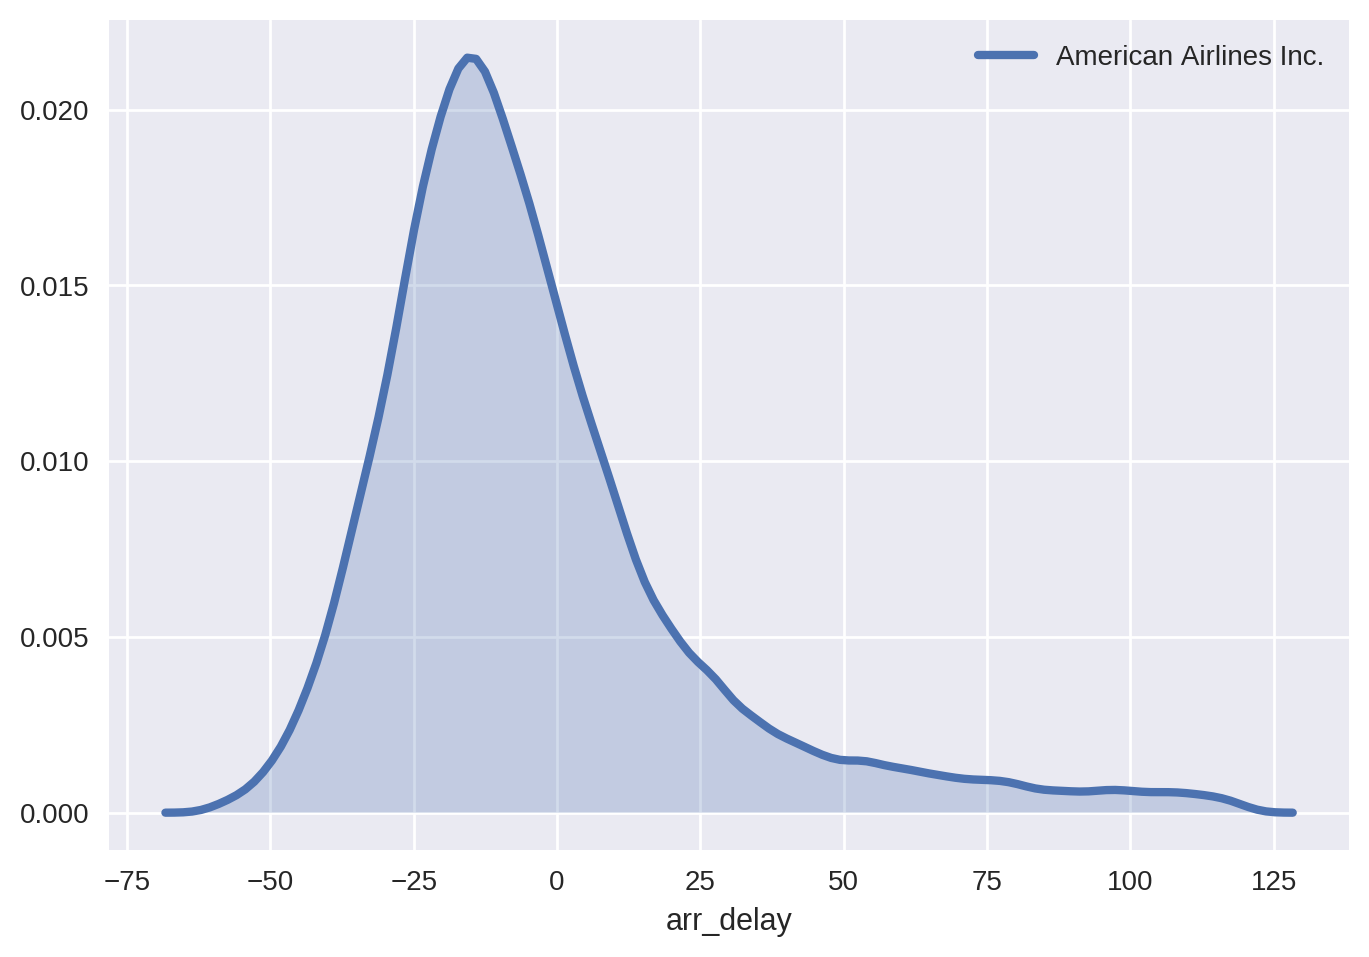

In [34]:
sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = airline)

In [3]:
 # Read in data

flights = pd.read_csv('data/flights.csv')
carriers = pd.read_csv('data/by_carrier.csv')
airlines = pd.read_csv('data/airlines.csv')

flights = flights.merge(airlines, how = 'left', on = 'carrier')
flights = flights[['arr_delay', 'name']] 

# Filter flight delays between -60 and 120 minutes
flights = flights[flights['arr_delay'].between(-60, 120)]
flights.head(10)

NameError: ignored

In [0]:
flights.to_csv('data/formatted_flights.csv')

In [0]:
flights = pd.read_csv('data/formatted_flights.csv')
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

# Histogram of All Arrival Delays 

## Matplotlib

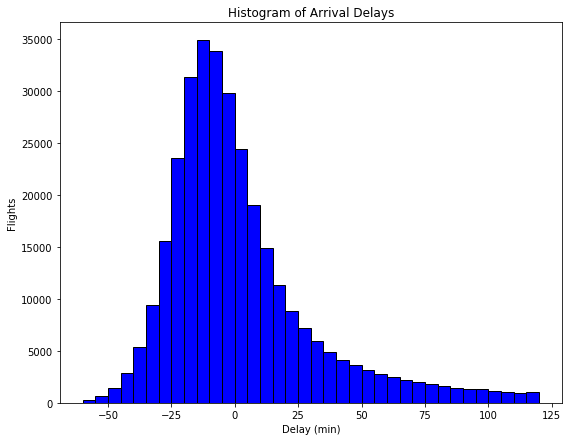

In [0]:
figsize(9, 7)

# Make the histogram using matplotlib, bins must be integet
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

## Seaborn

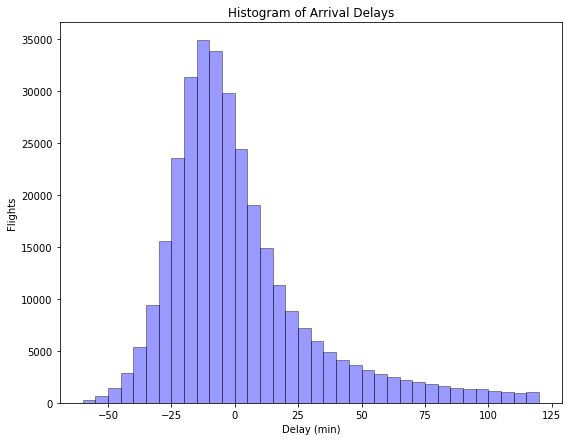

In [0]:
figsize(9, 7)

sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');


## Histogram with Varying Binwidths

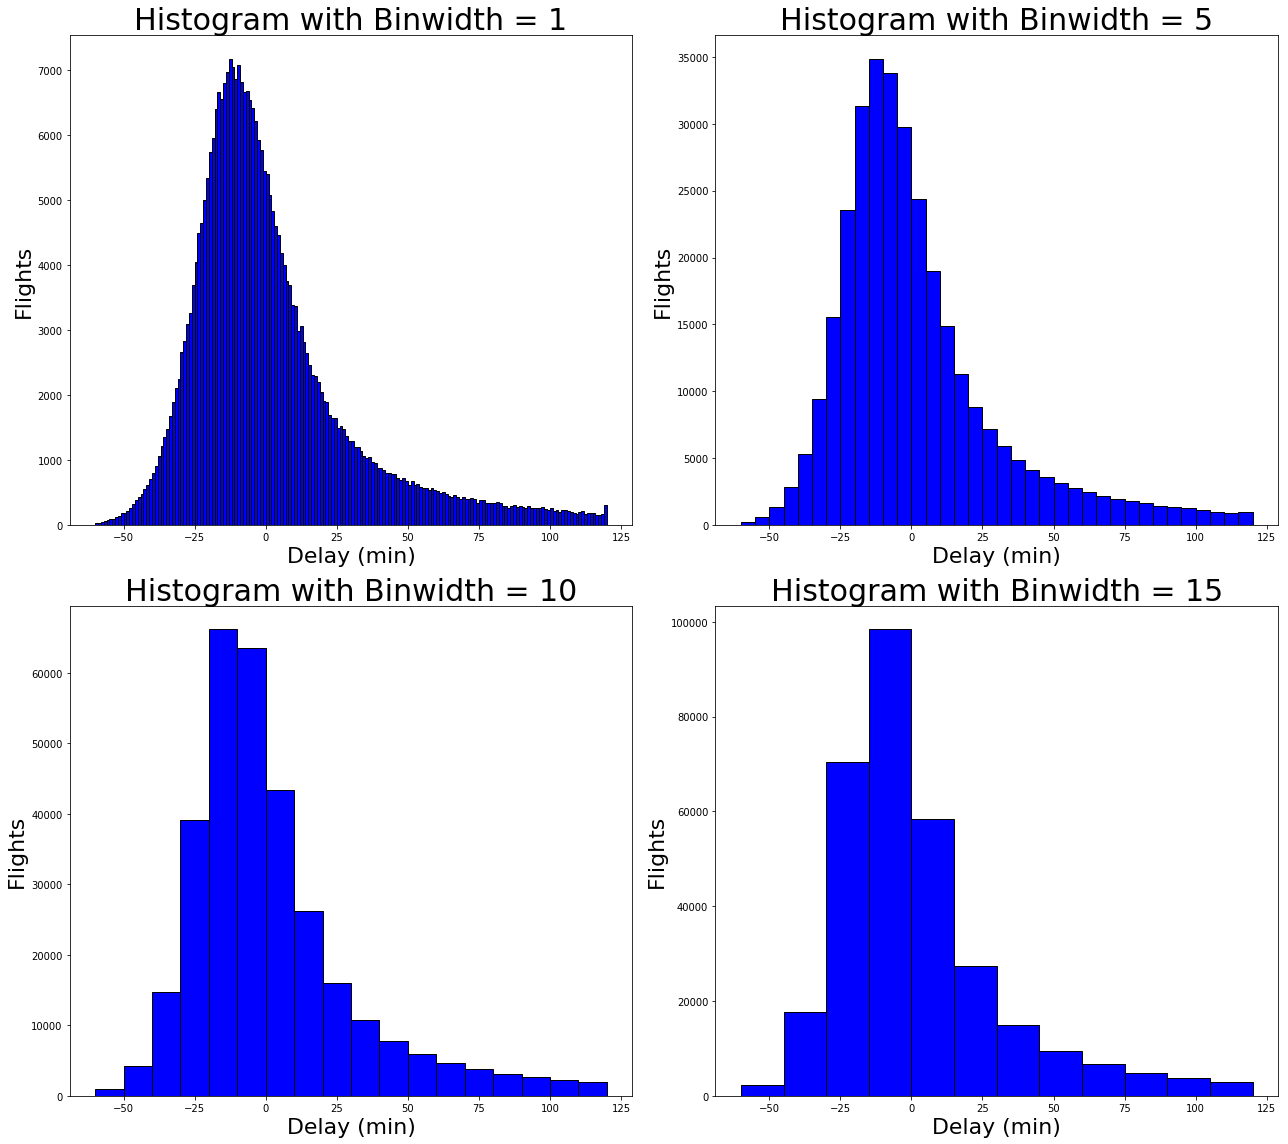

In [0]:
figsize(18, 16)

# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

# Where Histograms Fail: Multiple Categories

Histograms work very well for display a single variable from one category (in this case the one category was all the flights). However, for displaying multiple categories, a histogram does not work well because the plots are obscured.

In [0]:
# Extract top five airlines with most flights
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

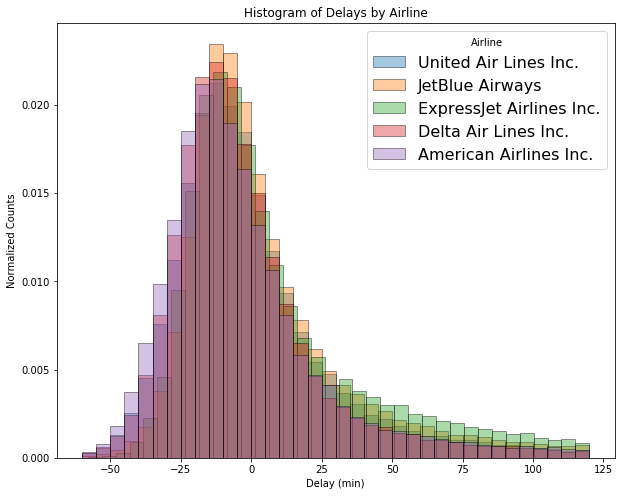

In [0]:
figsize(10, 8)

# Iterate through each of the five airlines
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

In [0]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

## Solution 1: Side-by-Side Histograms

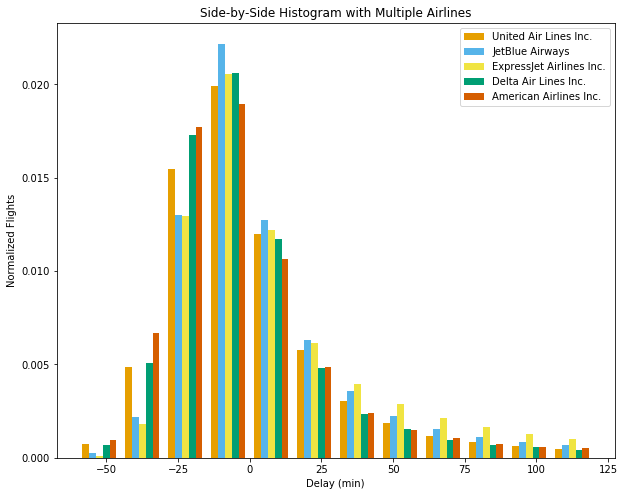

In [0]:
figsize(10, 8)

# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

## Solution 2: Stacked Histograms

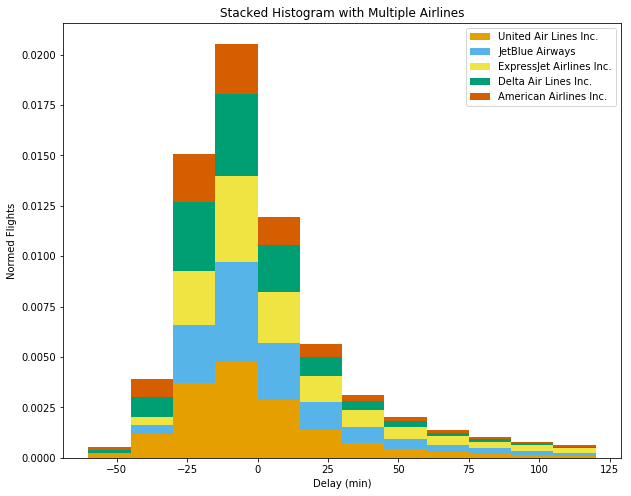

In [0]:
figsize(10, 8)
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         stacked=True,
         color = colors, label=names)

plt.legend(); plt.xlabel('Delay (min)'); plt.ylabel('Normed Flights');
plt.title('Stacked Histogram with Multiple Airlines');

# Solution 3: Density Plots

A density plot uses a kernel (by default a Gaussian) at every data point to create a distribution and then sums the distribution at each location to create a single distribution.

![](images/KDEWIKI.png)

This produces a smoothed version of a histogram where the y-axis is in density. This density can be thought of as a probability of the data value corresponding to the value on the x-axis, but this can create issues because the density may be greater than one. I usually just think of it as _density_, a value used for comparison purposes only. 

## Density Plot of All Delays Using Seaborn

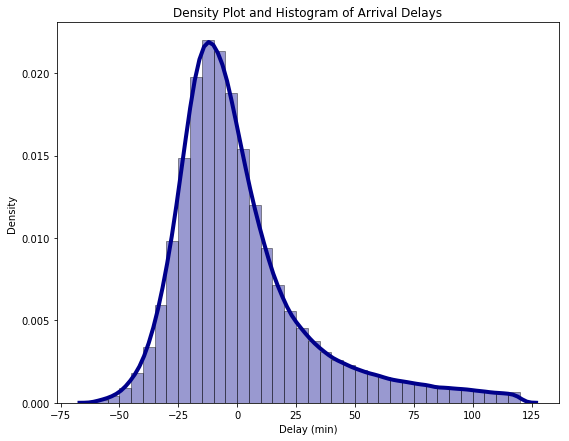

In [0]:
figsize(9, 7)

sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

plt.title('Density Plot and Histogram of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Density Plot with Varying Bandwidths

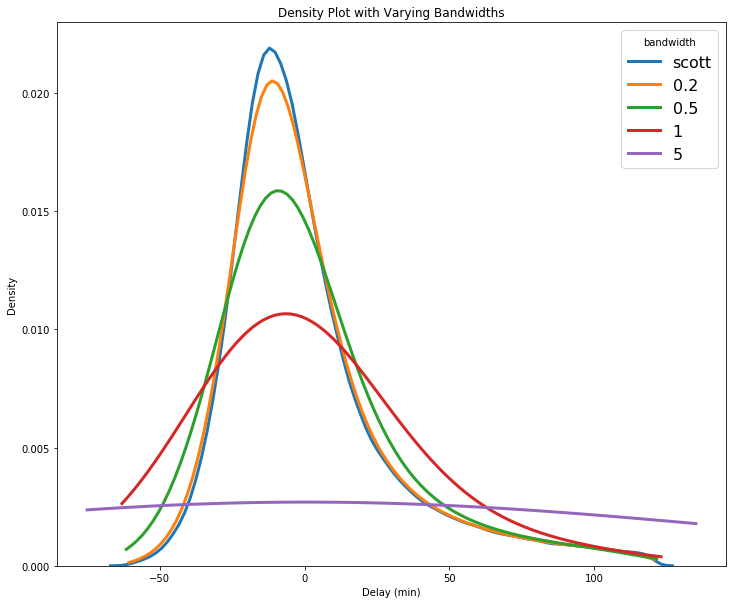

In [0]:
figsize(12, 10)

for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'bw': bandwidth, 'linewidth': 3},
                 label = bandwidth)
    
plt.legend(prop={'size': 16}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Different Kernels for the Density Plot

In [0]:
for kernel in ['gau', 'cos', 'biw', 'epa', 'tri', 'triw']:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'kernel': kernel, 'linewidth': 3},
                 label = kernel)
    
plt.legend(prop={'size': 16}, title = 'Kernel')
plt.title('Density Plot with Different Kernels'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

# Density Plot of Delays of Top Five

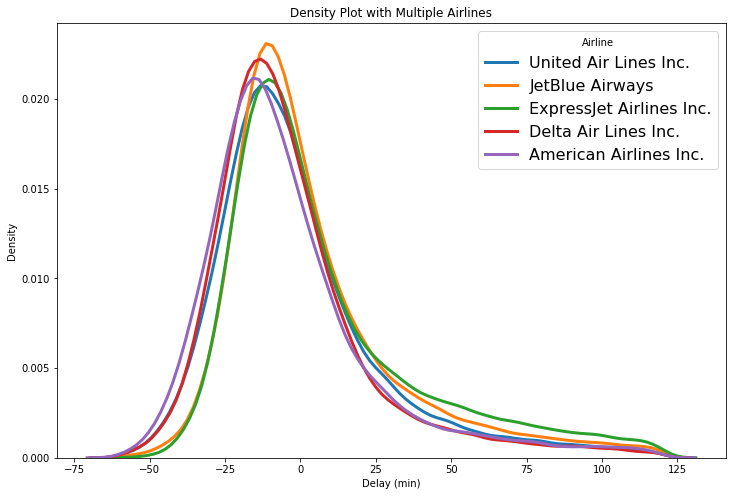

In [0]:
figsize(12, 8)

# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');

## Shaded Density Plot

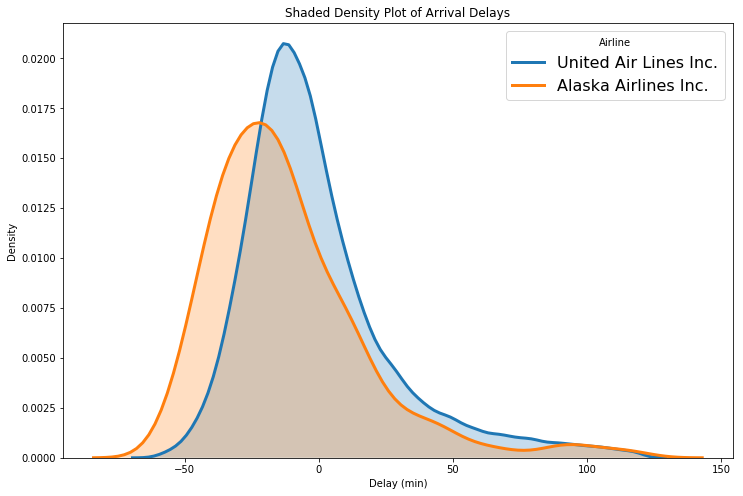

In [0]:
for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

## Density with Rug Plot

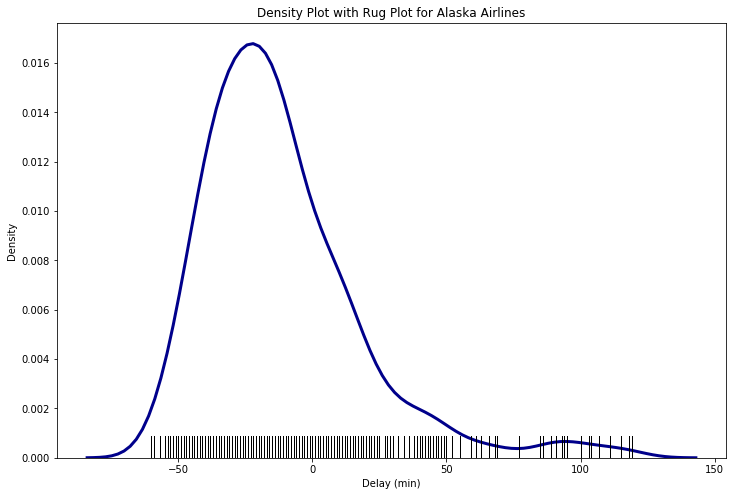

In [0]:
# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');